In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SYMBOL_A = "AI.PA"
SYMBOL_B = "LIN"
PERIOD = "1y"
SYMBOL = [SYMBOL_A,SYMBOL_B]


# Téléchargement des données
data = yf.download(SYMBOL, period=PERIOD, progress=False)
data = data.reset_index() # S'assurer que 'Date' est une colonne


In [34]:
data

Price        Date       Close                    High                     Low  \
Ticker                  AI.PA         LIN       AI.PA         LIN       AI.PA   
0      2025-01-07  156.444092  409.436951  156.601266  413.433130  154.027596   
1      2025-01-08  154.852753  414.429779  156.542342  414.834335  153.182814   
3      2025-01-10  153.320328  408.647583  155.815411  412.337914  153.045280   
4      2025-01-13  153.713257  415.830841  154.263353  417.064233  152.416604   
5      2025-01-14  153.143509  421.613037  155.697544  422.126118  152.730937   
..            ...         ...         ...         ...         ...         ...   
253    2025-12-30  160.619995  428.359985  160.960007  429.459991  159.800003   
254    2025-12-31  160.259995  426.390015  161.000000  429.000000  159.600006   
255    2026-01-02  159.000000  429.109985  160.399994  430.809998  157.979996   
256    2026-01-05  157.000000  433.100006  159.860001  433.989990  157.000000   
257    2026-01-06  157.479996  437.160004  157.899994  439.000000  154.860001   

Price                     Open                 Volume            AI_return  \
Ticker         LIN       AI.PA         LIN      AI.PA        LIN             
0       405.233540  155.206375  406.555733   873001.0  3209100.0  1.000000   
1       408.696973  156.247644  411.203205   754083.0  2252300.0  0.989828   
3       406.249875  155.127791  410.088177   671301.0  2642600.0  0.980033   
4       408.203562  153.182811  410.265790   604578.0  2824500.0  0.982544   
5       415.130319  155.383195  416.669590   539054.0  2344300.0  0.978902   
..             ...         ...         ...        ...        ...       ...   
253     423.399994  160.479996  424.000000   408724.0  1501800.0  1.026693   
254     426.279999  161.000000  427.109985   238734.0  1569200.0  1.024391   
255     422.079987  159.520004  426.279999   614495.0  2202400.0  1.016338   
256     424.070007  159.500000  425.609985   860127.0  2617800.0  1.003553   
257     433.459991  155.419998  434.070007  1194731.0  2359400.0  1.006622   

Price  LIN_return  
Ticker             
0        1.000000  
1        1.012194  
3        0.998072  
4        1.015616  
5        1.029739  
..            ...  
253      1.046217  
254      1.041406  
255      1.048049  
256      1.057794  
257      1.067710  

[247 rows x 13 columns]

In [20]:
data["AI_return"] = data["Close"]["AI.PA"] / data["Close"]["AI.PA"].iloc[0]
data["LIN_return"] = data["Close"]["LIN"] / data["Close"]["LIN"].iloc[0]

/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_81072/864940769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AI_return"] = data["Close"]["AI.PA"] / data["Close"]["AI.PA"].iloc[0]
/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_81072/864940769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["LIN_return"] = data["Close"]["LIN"] / data["Close"]["LIN"].iloc[0]


In [19]:
data = data.dropna()

In [11]:
data["Close"]["AI.PA"][0]

np.float64(156.444091796875)

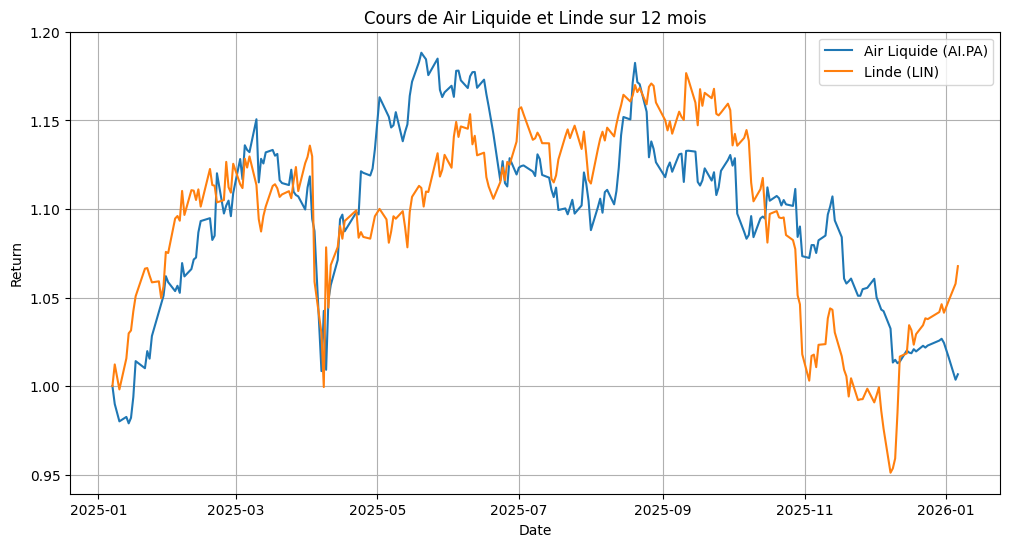

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(data['Date'], data['AI_return'], label='Air Liquide (AI.PA)')
plt.plot(data['Date'], data['LIN_return'], label='Linde (LIN)')

plt.title("Cours de Air Liquide et Linde sur 12 mois")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
data[['AI_return', 'LIN_return']].corr(method='pearson')

,Price,AI_return,LIN_return
,Ticker,,
Price,Ticker,,
AI_return,,1.000000,0.717377
LIN_return,,0.717377,1.000000


In [ ]:
#rolling_corr = data["AI_return"].rolling(60).corr(data["LIN_return"])

In [35]:
rolling_corr = data["AI_return"].rolling(window=60, min_periods=10).corr(data["LIN_return"])

In [36]:
rolling_corr 

0           NaN
1           NaN
3           NaN
4           NaN
5           NaN
         ...   
253    0.640496
254    0.624290
255    0.609209
256    0.584205
257    0.550085
Length: 247, dtype: float64

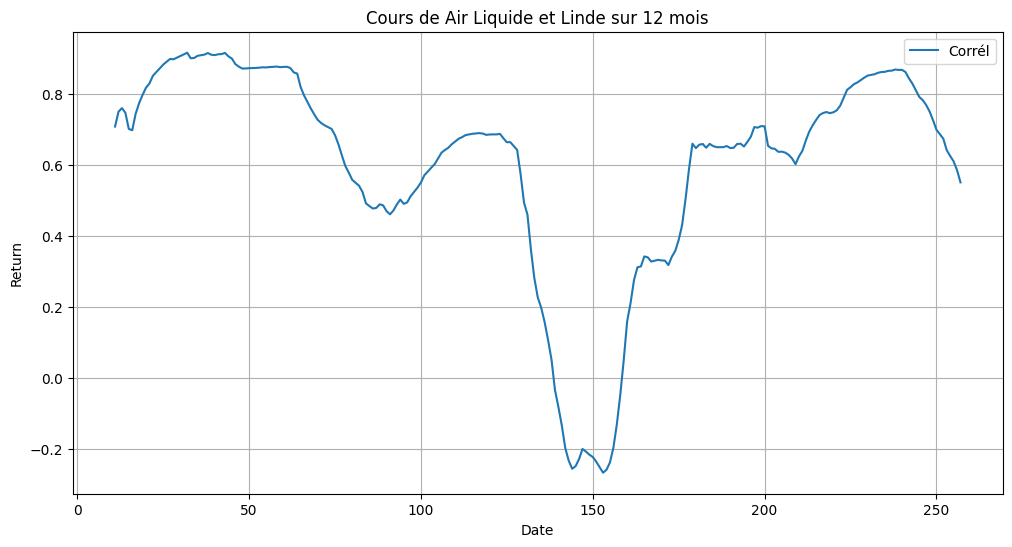

In [37]:
plt.figure(figsize=(12, 6))

plt.plot(rolling_corr, label='Corrél')


plt.title("Cours de Air Liquide et Linde sur 12 mois")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

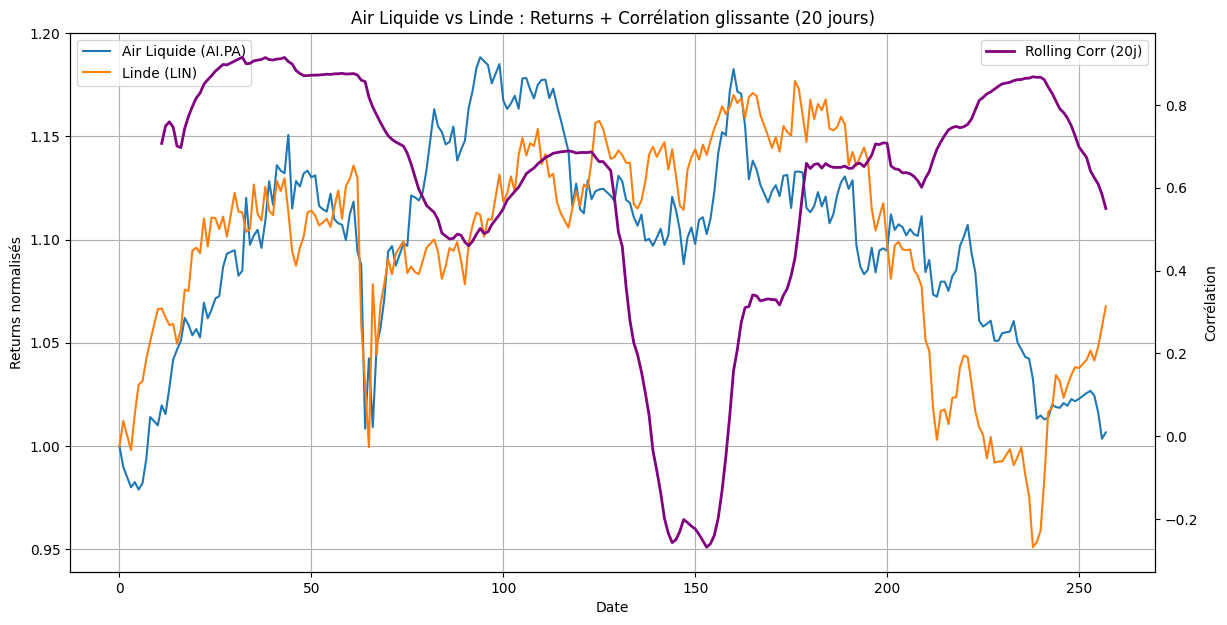

In [38]:
plt.figure(figsize=(14, 7))

# Axe principal : returns
ax1 = plt.gca()
ax1.plot(data.index, data['AI_return'], label='Air Liquide (AI.PA)')
ax1.plot(data.index, data['LIN_return'], label='Linde (LIN)')
ax1.set_ylabel("Returns normalisés")
ax1.set_xlabel("Date")
ax1.grid(True)
ax1.legend(loc="upper left")

# Axe secondaire : corrélation glissante
ax2 = ax1.twinx()
ax2.plot(data.index, rolling_corr, color='purple', linewidth=2, label='Rolling Corr (20j)')
ax2.set_ylabel("Corrélation")
ax2.legend(loc="upper right")

plt.title("Air Liquide vs Linde : Returns + Corrélation glissante (20 jours)")
plt.show()

In [39]:
spread = data['AI_return'] - data['LIN_return']
spread

0      0.000000
1     -0.022366
3     -0.018039
4     -0.033072
5     -0.050836
         ...   
253   -0.019525
254   -0.017014
255   -0.031711
256   -0.054241
257   -0.061089
Length: 247, dtype: float64

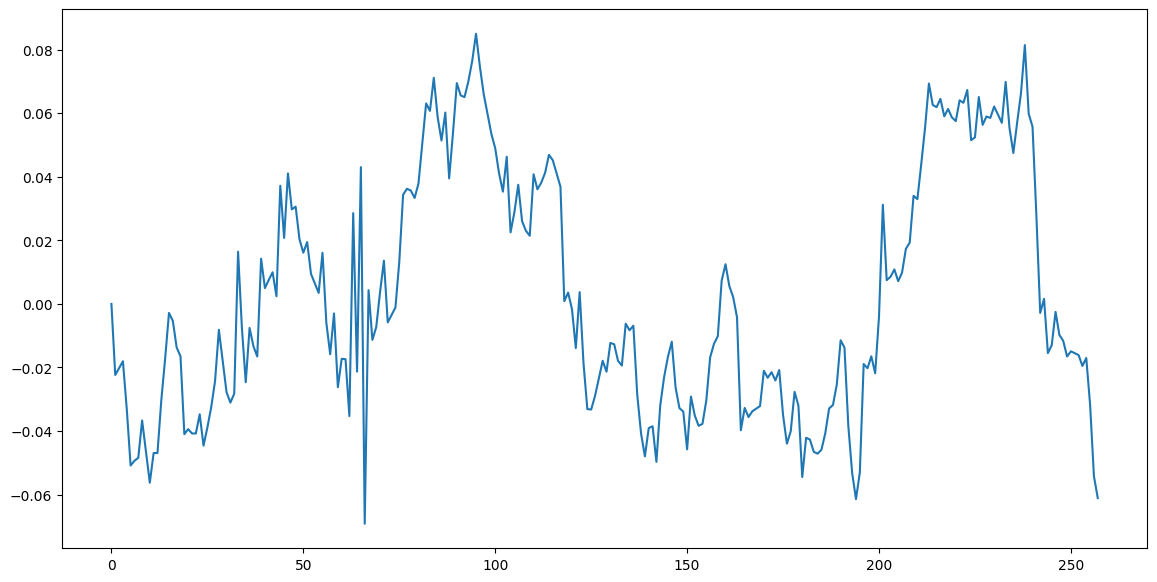

In [40]:
plt.figure(figsize = (14,7))

plt.plot(spread)
